In [1]:
from functools import reduce
from itertools import product, combinations

import math
from math import factorial, log, ceil, floor
import numpy as np 
from numpy import array, trace, dot, eye, zeros, diag, sqrt, mean, log2, outer, kron
from math import factorial, ceil
from scipy.stats import unitary_group
from scipy.linalg import norm, det, logm, block_diag, eigh
from random import uniform
from sage.combinat.symmetric_group_representations import SpechtRepresentation
from sage.combinat.permutation import Arrangements
from sage.combinat.partition import Partitions
from functools import reduce

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
matplotlib.rc('font', family='CMU Serif')
matplotlib.rcParams['mathtext.fontset'] = 'cm' 
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
def imm(matrix, partition):
    
    d = len(matrix)
    elements = [i+1 for i in range(d)]
    permutations = Arrangements(elements, d).list()
    representation = SymmetricGroupRepresentation(partition)
    
    immanant = 0
    for permutation in permutations:
        elements_product = 1
        for i in range(d):
            elements_product *= matrix[i][permutation[i]-1]
        character = representation.representation_matrix(Permutation(permutation)).trace()
        immanant += character*elements_product
        
    return immanant

In [2]:
def per(mat):
    def permanent(mtx, column, selected, prod, output=False):
        if column == mtx.shape[1]:
            if output:
                print(selected, prod)
            return prod
        else:
            result = 0
            for row in range(mtx.shape[0]):
                if not row in selected:
                    result = result + permanent(mtx, column+1, selected+[row], prod*mtx[row,column])
            return result
    return permanent(mat, 0, [], 1)

In [5]:
def random_hermitian(d, method="reg"):
    if method == "reg":
        A = array([[uniform(-1, 1) for i in range(d)] for j in range(d)]) + 1j*array([[uniform(-1, 1) for i in range(d)] for j in range(d)])
        return (A + A.conj().T)/2
    elif method == "dm":
        A = array([[uniform(-1, 1) for i in range(d)] for j in range(d)]) + 1j*array([[uniform(-1, 1) for i in range(d)] for j in range(d)])
        A = dot(A, A.conj().T)
        return A/trace(A)
    elif method == "rot":
        U = unitary_group.rvs(d)
        D = diag([uniform(0, 1) for i in range(d)])
        return reduce(dot, [U, D, U.conj().T])
    elif method == "log":
        U = unitary_group.rvs(d)
        return -1j*logm(U)

# Aux

In [46]:
d = 3

elements = [i+1 for i in range(d)]
permutations = Arrangements(elements, d).list()
partitions = Partitions(d).list()

Permutation([2,1,3,4]).to_cycles(singletons=False)
[(1, 2)]

[(1, 2)]

In [47]:
cycles = []
for permutation in permutations:
    cycles.append(Permutation(permutation).to_cycles(singletons=False))
cycles

[[], [(2, 3)], [(1, 2)], [(1, 2, 3)], [(1, 3, 2)], [(1, 3)]]

In [43]:
for partition in partitions:
    representation = SymmetricGroupRepresentation(partition)
    chars = []
    for permutation in permutations:
        chars.append(representation.representation_matrix(Permutation(permutation)).trace())
    print("partition =", partition)
    print("characters =", chars)
    print()

partition = [3]
characters = [1, 1, 1, 1, 1, 1]

partition = [2, 1]
characters = [2, 0, 0, -1, -1, 0]

partition = [1, 1, 1]
characters = [1, -1, -1, 1, 1, -1]



# Exact

## Variances

In [10]:
d = 4

elements = [i+1 for i in range(d)]
permutations = Arrangements(elements, d).list()
partitions = Partitions(d).list()

In [11]:
h = random_hermitian(d)
hh = dot(h, h)

variances = []
for partition in partitions:
        
    representation = SymmetricGroupRepresentation(partition)
    char_id = representation.representation_matrix(Permutation(permutations[0])).trace()
        
    immanant = imm(h, partition)
    immanant_sq = imm(hh, partition)
        
    variance = immanant_sq - immanant**2
    variances.append(variance.real)
variances

[1.9803569048888634,
 4.517433785695342,
 2.4510112865266658,
 2.7477918894979787,
 -4.440892098500626e-16]

## Many runs

In [27]:
d = 5

elements = [i+1 for i in range(d)]
permutations = Arrangements(elements, d).list()
partitions = Partitions(d).list()
# partitions = [[6], [5, 1], [4, 2], [3, 3], [4, 1, 1], [3, 2, 1], [2, 2, 2], [3, 1, 1, 1], [2, 2, 1, 1], [2, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]

n_runs = 100

immanants = []
variances = []
for n in range(n_runs):
    print(n, end="\r")
    
    h = random_hermitian(d, "reg")
    hh = dot(h, h)

    immanants_loc = []
    variances_loc = []
    for partition in partitions:

        representation = SymmetricGroupRepresentation(partition)
        char_id = representation.representation_matrix(Permutation(permutations[0])).trace()

        immanant = imm(h, partition).real/char_id
        immanant_sq = imm(hh, partition).real/char_id
        variance = immanant_sq - immanant**2
        
        immanants_loc.append(immanant)
        variances_loc.append(variance.real)    
        
    ### checks ###
    # for k in range(1, len(partitions)):
    #     if variances_loc[k] > variances_loc[k-1]:
    #         print("\t bad variance:")
    #         print("\t\t", partitions[k-1], ":", variances_loc[k-1])
    #         print("\t\t", partitions[k], ":", variances_loc[k])
    # for k in range(1, len(partitions)):
    #     if immanants_loc[k] > immanants_loc[k-1]:
    #         print("\t bad immanant:")
    #         print("\t\t", partitions[k-1], ":", immanants_loc[k-1])
    #         print("\t\t", partitions[k], ":", immanants_loc[k])
    # print()
        
    immanants.append(immanants_loc)
    variances.append(variances_loc)

immanants_mean = mean(immanants, axis=0)
variances_mean = mean(variances, axis=0)

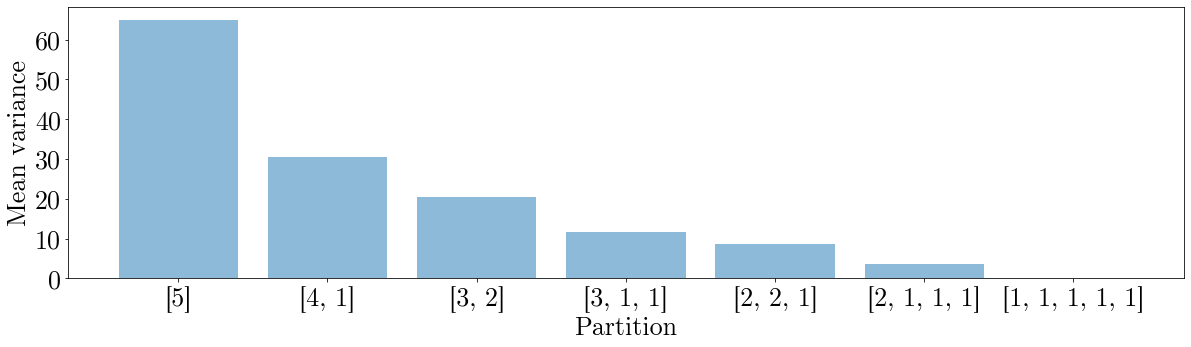

In [28]:
fontsize = 26
plt.figure(figsize=(20, 5))
plt.bar([i for i in range(len(partitions))], variances_mean, align='center', alpha=0.5)
plt.xticks([i for i in range(len(partitions))], partitions, fontsize=fontsize)
# plt.xticks([i for i in range(7)], [r"$[5]$", r"$[4,1]$", r"$[3,2]$", r"$[3,1^2]$", r"$[2^2,1]$", r"$[2,1^3]$", r"$[1^5]$"], fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Partition", fontsize=fontsize)
plt.ylabel("Mean variance", fontsize=fontsize)
plt.show()

# fontsize = 26
# plt.figure(figsize=(20, 8))
# plt.bar([i for i in range(len(partitions))], immanants_mean, align='center', alpha=0.5, color="C1")
# plt.xticks([i for i in range(len(partitions))], partitions, fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.xlabel("Partition", fontsize=fontsize)
# plt.ylabel("Mean immanant", fontsize=fontsize)
# plt.show()

# Quantum

In [34]:
def partial_trace(density_matrix, n_qudits, dim_qudit, subsystems):
    
    I_np = eye(dim_qudit)
    
    vecs = [vec for vec in eye(dim_qudit)]
    bunches = list(product(*[vecs for i in range(len(subsystems))]))
    ops = []
    for bunch in bunches:
        l = 0
        op = [I_np]*n_qudits
        for q in range(n_qudits):
            if q in subsystems:
                op[q] = bunch[l]
                l += 1
        ops.append(reduce(kron, op))
    
    n_qudits_new = n_qudits - len(subsystems)
    dm_reduced = zeros((dim_qudit**n_qudits_new, dim_qudit**n_qudits_new))
    for op in ops:
        dm_reduced = dm_reduced + reduce(dot, [op, density_matrix, op.conj().T])
            
    return dm_reduced

In [35]:
def GME_pure(state_vector, n_qudits, dim_qudit):
    
    density_matrix = outer(state_vector, state_vector.conj().T)

    L = ceil(n_qudits / 2) + 1
    combs = []
    for n_picks in range(1, L):
        for subset in combinations([i for i in range(n_qudits)], n_picks):
            combs.append(list(subset))
    
    # GME_min = sqrt(2*(1 - 1/dim_qudit**(n_qudits-1)))
    GME_min = sqrt(2)
    partition_min = None
    for subsystems in combs:
        dm_partial = partial_trace(density_matrix, n_qudits, dim_qudit, subsystems)
        GME = sqrt(2*(1 - trace(dot(dm_partial, dm_partial)).real))
        if GME < GME_min:
            GME_min = GME
            partition_min = subsystems
    
    return GME_min, partition_min

In [36]:
def vn_entropies(state_vector, n_qudits, dim_qudit):
    
    density_matrix = outer(state_vector, state_vector.conj().T)

    L = ceil(n_qudits / 2) + 1
    combs = []
    for n_picks in range(1, L):
        for subset in combinations([i for i in range(n_qudits)], n_picks):
            combs.append(list(subset))
    
    etns = []
    for subsystems in combs:
        dm_partial = partial_trace(density_matrix, n_qudits, dim_qudit, subsystems)
        evals = eigh(dm_partial)[0]
        ent = sum([-e*log(e) if e>0 else 0 for e in evals ])
        etns.append(ent)
    
    return etns, combs

In [37]:
def concurrence(dm):
    return sqrt(2*(1 - trace(dot(dm, dm)).real))

In [38]:
def state_dict_to_vector(d, state_dict):
    basis = eye(d)
    state_vector = 1j*zeros(d**d)
    for string, character in state_dict.items():   
        state_vector = state_vector + character*reduce(kron, [basis[int(i)].reshape(-1,1) for i in string]).T[0]
    return state_vector

In [39]:
d = 4

elements = [i+1 for i in range(d)]
permutations = Arrangements(elements, d).list()
partitions = Partitions(d).list()

states = []
for partition in partitions:
    state = {}
    representation = SymmetricGroupRepresentation(partition)
    for permutation in permutations:
        character = representation.representation_matrix(Permutation(permutation)).trace()
        if character != 0:
            string = ''.join(str(num-1) for num in permutation)
            state[string] = character
    states.append((partition, state))

In [40]:
statevectors = []
for state in states:
    state_vector = state_dict_to_vector(d, state[1]) / sqrt(factorial(d))
    statevectors.append(state_vector)

In [41]:
states

[([4],
  {'0123': 1,
   '0132': 1,
   '0213': 1,
   '0231': 1,
   '0312': 1,
   '0321': 1,
   '1023': 1,
   '1032': 1,
   '1203': 1,
   '1230': 1,
   '1302': 1,
   '1320': 1,
   '2013': 1,
   '2031': 1,
   '2103': 1,
   '2130': 1,
   '2301': 1,
   '2310': 1,
   '3012': 1,
   '3021': 1,
   '3102': 1,
   '3120': 1,
   '3201': 1,
   '3210': 1}),
 ([3, 1],
  {'0123': 3,
   '0132': 1,
   '0213': 1,
   '0321': 1,
   '1023': 1,
   '1032': -1,
   '1230': -1,
   '1302': -1,
   '2031': -1,
   '2103': 1,
   '2301': -1,
   '2310': -1,
   '3012': -1,
   '3120': 1,
   '3201': -1,
   '3210': -1}),
 ([2, 2],
  {'0123': 2,
   '0231': -1,
   '0312': -1,
   '1032': 2,
   '1203': -1,
   '1320': -1,
   '2013': -1,
   '2130': -1,
   '2301': 2,
   '3021': -1,
   '3102': -1,
   '3210': 2}),
 ([2, 1, 1],
  {'0123': 3,
   '0132': -1,
   '0213': -1,
   '0321': -1,
   '1023': -1,
   '1032': -1,
   '1230': 1,
   '1302': 1,
   '2031': 1,
   '2103': -1,
   '2301': -1,
   '2310': 1,
   '3012': 1,
   '3120': -1,
   '3

[4]
[3, 1]
[2, 2]
[2, 1, 1]
[1, 1, 1, 1]


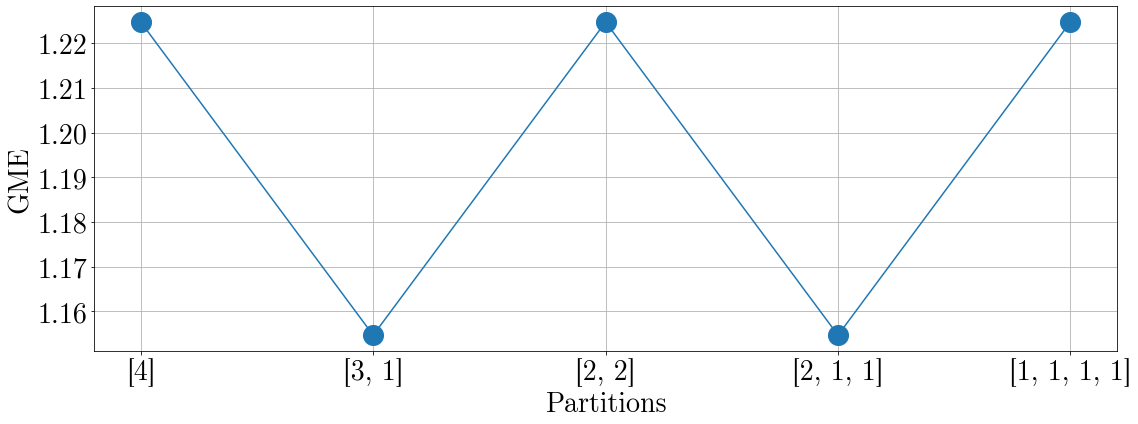

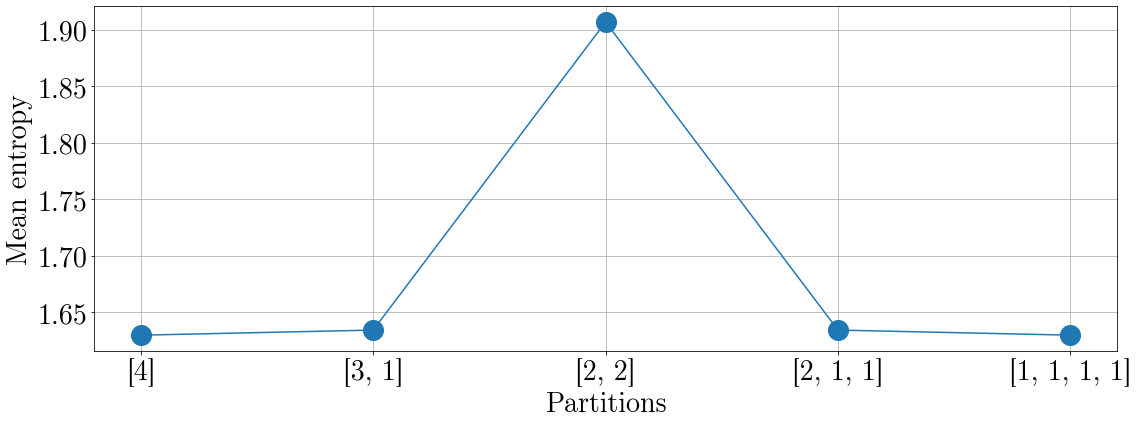

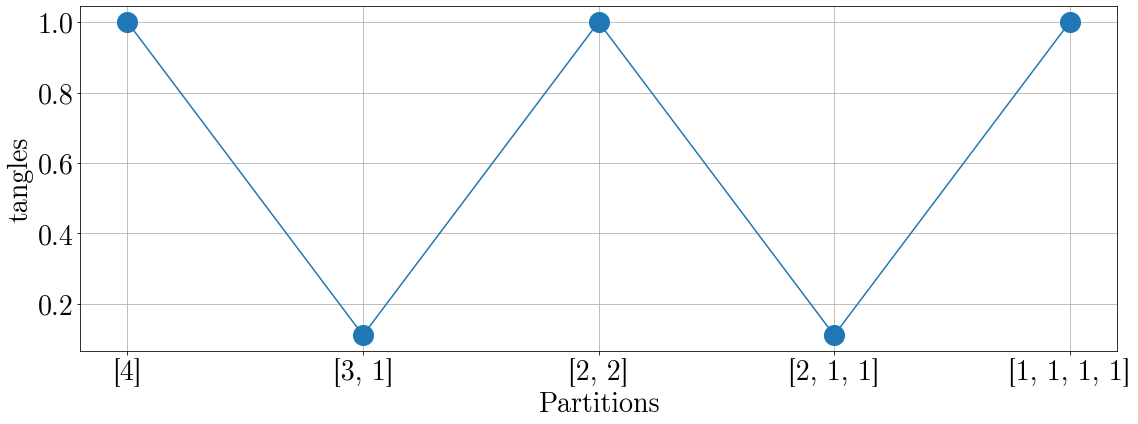

In [43]:
d = 4

elements = [i+1 for i in range(d)]
permutations = Arrangements(elements, d).list()
partitions = Partitions(d).list()

states = []
for partition in partitions:
    state = {}
    representation = SymmetricGroupRepresentation(partition)
    for permutation in permutations:
        character = representation.representation_matrix(Permutation(permutation)).trace()
        if character != 0:
            string = ''.join(str(num-1) for num in permutation)
            state[string] = character
    states.append((partition, state))
    
gmes = []
ents = []
for state in states:
    state_vector = state_dict_to_vector(d, state[1]) / sqrt(factorial(d))
    print(state[0])
    gmes.append(GME_pure(state_vector, d, d)[0])
    ents.append(vn_entropies(state_vector, d, d)[0])
    
Y = array([[0.,-1.j],
           [1.j, 0.]])
Y8 = reduce(kron, [Y]*8)
ntangles = []
for state in states:
    sv = state_dict_to_vector(d, state[1]) / sqrt(factorial(d))
    ntangles.append( abs(reduce(dot, [sv.conj().T, Y8, sv.conj()]))**2 )
    
fontsize = 28
linewidth = 4
plt.figure(figsize=(16, 6))
plt.plot(gmes, marker="o", markersize=20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks([i for i in range(len(partitions))], partitions, fontsize=fontsize)
plt.xlabel("Partitions", fontsize=fontsize)
plt.ylabel("GME", fontsize=fontsize)
plt.grid()
plt.tight_layout()
# plt.savefig("d=" + str(d) + "-l=" + str(n_layers) + "-r=" + str(n_runs) + "-overlap_gain.pdf", bbox_inches='tight')
plt.show()

fontsize = 28
linewidth = 4
plt.figure(figsize=(16, 6))
plt.plot(mean(ents, axis=1), marker="o", markersize=20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks([i for i in range(len(partitions))], partitions, fontsize=fontsize)
plt.xlabel("Partitions", fontsize=fontsize)
plt.ylabel("Mean entropy", fontsize=fontsize)
plt.grid()
plt.tight_layout()
# plt.savefig("d=" + str(d) + "-l=" + str(n_layers) + "-r=" + str(n_runs) + "-overlap_gain.pdf", bbox_inches='tight')
plt.show()

fontsize = 28
linewidth = 4
plt.figure(figsize=(16, 6))
plt.plot(ntangles, marker="o", markersize=20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks([i for i in range(len(partitions))], partitions, fontsize=fontsize)
plt.xlabel("Partitions", fontsize=fontsize)
plt.ylabel("tangles", fontsize=fontsize)
plt.grid()
plt.tight_layout()
# plt.savefig("d=" + str(d) + "-l=" + str(n_layers) + "-r=" + str(n_runs) + "-overlap_gain.pdf", bbox_inches='tight')
plt.show()

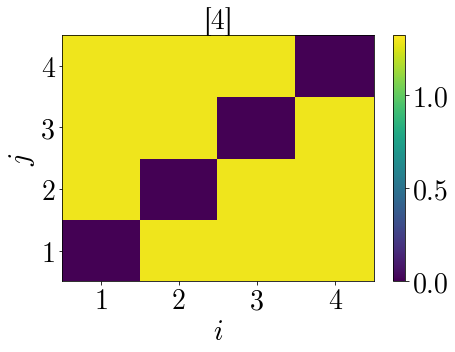

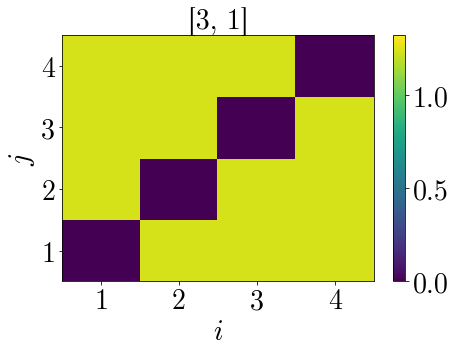

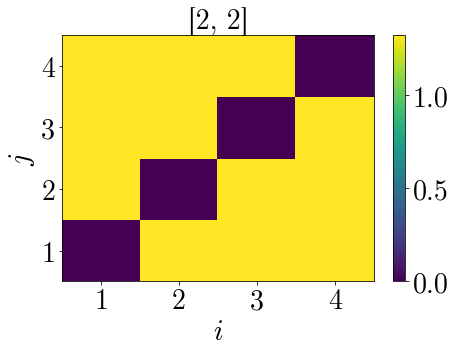

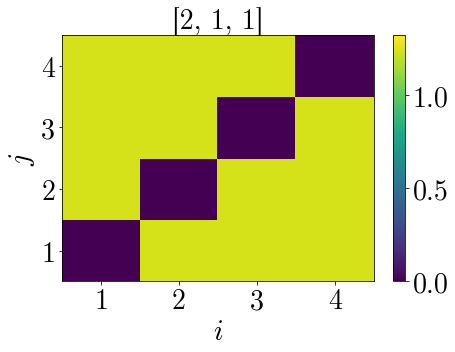

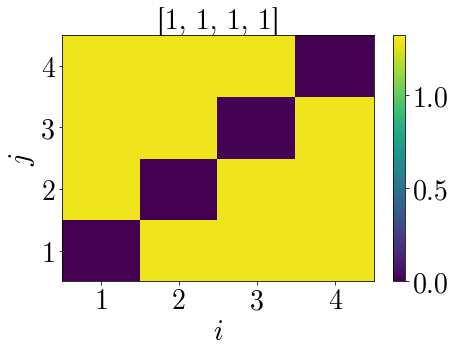

In [44]:
concurrences = []
for state in states:
    state_vector = state_dict_to_vector(d, state[1]) / sqrt(factorial(d))
    dm = outer(state_vector, state_vector.conj().T)
    concurrences_loc = zeros((d, d))
    for x in range(d):
        for y in range(x):
            subsystems = [i for i in range(d)]
            subsystems.remove(x)
            subsystems.remove(y)
            dm_red = partial_trace(dm, d, d, subsystems)
            conc = concurrence(dm_red)
            concurrences_loc[x][y] = conc
            concurrences_loc[y][x] = conc
    concurrences.append(concurrences_loc)

ss = [i for i in range(1, d+1)]
for conc, part in zip(concurrences, partitions):
    x, y, z = ss, ss, conc
    plt.figure(figsize=(6.5, 5))
    plt.pcolor(x, y, z, shading='auto', snap=False, vmin=0, vmax=np.max(concurrences))#)#, interpolation='gaussian', cmap=cmap
    plt.xlabel(r'$i$', fontsize=fontsize)
    plt.ylabel(r'$j$', fontsize=fontsize)
    plt.title(str(part), fontsize=fontsize)
    plt.xticks(ss, ss, fontsize=fontsize)
    plt.yticks(ss, ss, fontsize=fontsize)
    plt.colorbar().ax.tick_params(labelsize=fontsize)
    plt.tight_layout()
    plt.show()

## Variances

In [77]:
d = 3

elements = [i+1 for i in range(d)]
permutations = Arrangements(elements, d).list()
partitions = Partitions(d).list()

In [94]:
# h = random_hermitian(d)
H = reduce(kron, [h]*d)

immanants = []
variances = []
for partition in partitions:
    
    state_dict = {}
    representation = SymmetricGroupRepresentation(partition)
    for permutation in permutations:
        character = representation.representation_matrix(Permutation(permutation)).trace()
        if character != 0:
            string = ''.join(str(num-1) for num in permutation)
            state_dict[string] = character
    state_vector = state_dict_to_vector(d, state_dict) / sqrt(factorial(d))
    
    char_id = representation.representation_matrix(Permutation(permutations[0])).trace()
        
    immanant = reduce(dot, [state_vector.conj().T, H, state_vector]).real
    immanant_sq = reduce(dot, [state_vector.conj().T, dot(H, H), state_vector]).real
    variance = immanant_sq - immanant**2
    immanants.append(immanant)
    variances.append(variance.real)
    
    # print(partition)
    # print()
    # print("\t immanant exact:", imm(h, partition).real)
    # print("\t immanant quant:", immanant*char_id)
    # print("\t exact/quant:   ", imm(h, partition).real/(immanant*char_id))
    # print()
    # print("\t immanant_sq exact:", imm(dot(h, h), partition).real)
    # print("\t immanant_sq quant:", immanant_sq*char_id)
    # print("\t exact/quant:   ", imm(dot(h, h), partition).real/(immanant_sq*char_id))
    # print()
    # print("\t sq_immanant exact:", imm(h, partition).real**2)
    # print("\t sq_immanant quant:", (immanant*char_id)**2)
    # print("\t exact/quant:   ", imm(h, partition).real**2/(immanant*char_id)**2)
    # print()
    # print("\t variance exact:", imm(dot(h,h), partition).real - imm(h, partition).real**2)
    # print("\t variance quant:", variance)
    # print("\t exact/quant:   ", (imm(dot(h,h), partition).real - imm(h, partition).real**2) / variance)
    # print()
    # print("\t chi_e:         ", char_id)
    # print()
    
    # immanant = immanant*char_id
    # immanant_sq = immanant_sq*char_id
    # variance = immanant_sq - immanant**2
    
    immanant_ex = imm(h, partition).real/char_id
    immanant_sq_ex = imm(dot(h, h), partition).real/char_id
    variance_ex = immanant_sq_ex - immanant_ex**2
    
    print(partition)
    print()
    print("\t immanant exact:", immanant_ex)
    print("\t immanant quant:", immanant)
    print("\t exact/quant:   ", immanant_ex/immanant)
    print()
    print("\t immanant_sq exact:", immanant_sq_ex)
    print("\t immanant_sq quant:", immanant_sq)
    print("\t exact/quant:   ", immanant_sq_ex/immanant_sq)
    print()
    print("\t sq_immanant exact:", immanant_ex**2)
    print("\t sq_immanant quant:", immanant**2)
    print("\t exact/quant:   ", immanant_ex**2/immanant**2)
    print()
    print("\t variance exact:", variance_ex)
    print("\t variance quant:", variance)
    print("\t exact/quant:   ", variance_ex / variance)
    print()
    print("\t chi_e:         ", char_id)
    print()
variances

[3]

	 immanant exact: 0.6304201528316463
	 immanant quant: 0.6304201528316465
	 exact/quant:    0.9999999999999997

	 immanant_sq exact: 0.41763422248891857
	 immanant_sq quant: 0.4176342224889189
	 exact/quant:    0.9999999999999992

	 sq_immanant exact: 0.3974295690962763
	 sq_immanant quant: 0.3974295690962766
	 exact/quant:    0.9999999999999993

	 variance exact: 0.02020465339264227
	 variance quant: 0.020204653392642324
	 exact/quant:    0.9999999999999972

	 chi_e:          1

[2, 1]

	 immanant exact: 0.6228364692060078
	 immanant quant: 0.6228364692060078
	 exact/quant:    1.0

	 immanant_sq exact: 0.39656182803208717
	 immanant_sq quant: 0.3965618280320875
	 exact/quant:    0.9999999999999991

	 sq_immanant exact: 0.38792526737300626
	 sq_immanant quant: 0.38792526737300626
	 exact/quant:    1.0

	 variance exact: 0.008636560659080916
	 variance quant: 0.00863656065908125
	 exact/quant:    0.9999999999999615

	 chi_e:          2

[1, 1, 1]

	 immanant exact: 0.61595220546554

[0.020204653392642324, 0.00863656065908125, -5.551115123125783e-17]

## Many runs

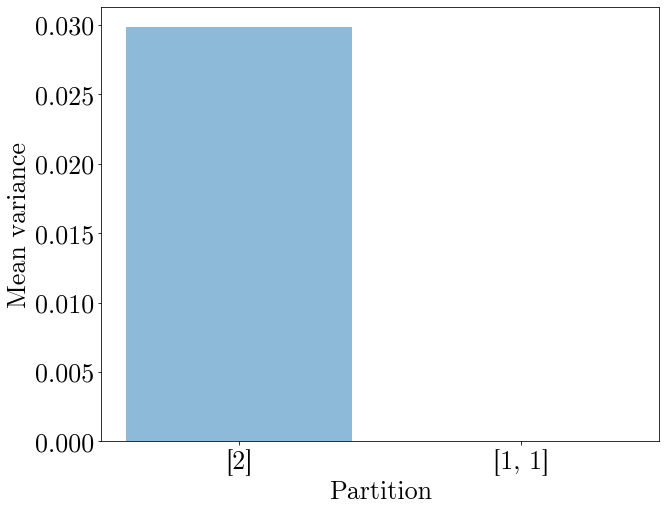

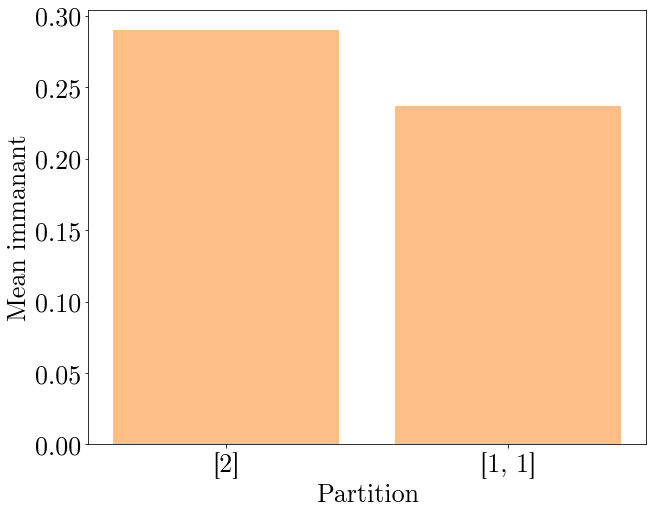

In [21]:
d = 2 

elements = [i+1 for i in range(d)]
permutations = Arrangements(elements, d).list()
partitions = Partitions(d).list()

n_runs = 100

immanants = []
variances = []
for n in range(n_runs):
    print(n, end="\r")
    
    h = random_hermitian(d)
    H = reduce(kron, [h]*d)

    immanants_loc = []
    variances_loc = []
    for partition in partitions:

        state_dict = {}
        representation = SymmetricGroupRepresentation(partition)
        for permutation in permutations:
            character = representation.representation_matrix(Permutation(permutation)).trace()
            if character != 0:
                string = ''.join(str(num-1) for num in permutation)
                state_dict[string] = character
        state_vector = state_dict_to_vector(d, state_dict) / sqrt(factorial(d))

        char_id = 1#representation.representation_matrix(Permutation(permutations[0])).trace()
        
        immanant = reduce(dot, [state_vector.conj().T, H, state_vector]).real / char_id
        immanants_loc.append(immanant)
        variance = reduce(dot, [state_vector.conj().T, dot(H, H), state_vector]) - immanant**2
        variances_loc.append(variance.real)    
        
    imm_check = immanants_loc[0]
    for immanant in immanants_loc:
        if immanant > imm_check:
            print("\timmanant bad", immanants_loc)
        imm_check = immanant
        
    var_check = variances_loc[0]
    for variance in variances_loc:
        if variance > var_check:
            print("\tvariance bad", variances_loc)
        var_check = variance
        
    immanants.append(immanants_loc)
    variances.append(variances_loc)

immanants_mean = mean(immanants, axis=0)
variances_mean = mean(variances, axis=0)


fontsize = 26
plt.figure(figsize=(10, 8))
plt.bar([i for i in range(len(partitions))], variances_mean, align='center', alpha=0.5)
plt.xticks([i for i in range(len(partitions))], partitions, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Partition", fontsize=fontsize)
plt.ylabel("Mean variance", fontsize=fontsize)
plt.show()

fontsize = 26
plt.figure(figsize=(10, 8))
plt.bar([i for i in range(len(partitions))], immanants_mean, align='center', alpha=0.5, color="C1")
plt.xticks([i for i in range(len(partitions))], partitions, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Partition", fontsize=fontsize)
plt.ylabel("Mean immanant", fontsize=fontsize)
plt.show()

# Qubits

In [4]:
def state_dict_to_vector_qubits(d, state_dict):
    
    n_qubits = ceil(log2(d))
    dq = 2**n_qubits

    qubit_basis = eye(dq)
    state_vector = 1j*zeros(dq**d)
    for string, character in state_dict.items():
        state_vector = state_vector + character*reduce(kron, [qubit_basis[int(i)].reshape(-1,1) for i in string]).T[0]
        
    return state_vector

In [5]:
d = 4

elements = [i+1 for i in range(d)]
permutations = Arrangements(elements, d).list()
partitions = Partitions(d).list()

states = []
for partition in partitions:
    state = {}
    representation = SymmetricGroupRepresentation(partition)
    for permutation in permutations:
        character = representation.representation_matrix(Permutation(permutation)).trace()
        if character != 0:
            string = ''.join(str(num-1) for num in permutation)
            state[string] = character
    states.append((partition, state))

In [12]:
state_dict = states[-1][-1]
state_vector_det = state_dict_to_vector_qubits(d, states[-1][-1]) / sqrt(factorial(d))
state_vector_per = state_dict_to_vector_qubits(d, states[0][-1]) / sqrt(factorial(d))

dq = 2**ceil(log2(d))
H1 = random_hermitian(d)
H2 = block_diag(H1, diag([1]*(dq-d)))

H2_quant = reduce(kron, [H2]*d)
det_quant = reduce(dot, [state_vector_det.conj().T, H2_quant, state_vector_det]) 
per_quant = reduce(dot, [state_vector_per.conj().T, H2_quant, state_vector_per]) 


print("det(H1) exact:", det(H1).real)
print("det(H2) exact:", det(H2).real)
print("det(H2) quant:", det_quant.real)
print()
print("per(H1) exact:", permanent(H1).real)
print("per(H2) exact:", permanent(H2).real)
print("per(H2) quant:", per_quant.real)

det(H1) exact: 2.454806886526832
det(H2) exact: 2.454806886526832
det(H2) quant: 2.454806886526833

per(H1) exact: 0.4963750234751833
per(H2) exact: 0.4963750234751833
per(H2) quant: 0.49637502347518314
